In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv(r"C:\Users\86151\Downloads\train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#select feature
data.drop(['Cabin','Name','Ticket'], inplace = True, axis = 1)

In [7]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [8]:
#dealing with missed age
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [12]:
labels = data['Embarked'].unique().tolist()

In [13]:
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))

C:\Users\86151\AppData\Local\Temp\ipykernel_10640\1099875299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))


In [14]:
data['Sex'] = (data['Sex'] == 'male').astype('int')

C:\Users\86151\AppData\Local\Temp\ipykernel_10640\3426856229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = (data['Sex'] == 'male').astype('int')


In [15]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [16]:
x = data.iloc[:,data.columns != 'Survived']

In [17]:
y = data.iloc[:,data.columns == 'Survived']

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y,test_size = 0.3)

In [19]:
xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
127,128,3,1,24.000000,0,0,7.1417,0
233,234,3,0,5.000000,4,2,31.3875,0
822,823,1,1,38.000000,0,0,0.0000,0
38,39,3,0,18.000000,2,0,18.0000,0
74,75,3,1,32.000000,0,0,56.4958,0
...,...,...,...,...,...,...,...,...
2,3,3,0,26.000000,0,0,7.9250,0
377,378,1,1,27.000000,0,2,211.5000,1
522,523,3,1,29.699118,0,0,7.2250,1
716,717,1,0,38.000000,0,0,227.5250,1


In [20]:
for i in [xtrain,xtest,ytrain,ytest]:
    i.index = range(i.shape[0])

In [21]:
xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,128,3,1,24.000000,0,0,7.1417,0
1,234,3,0,5.000000,4,2,31.3875,0
2,823,1,1,38.000000,0,0,0.0000,0
3,39,3,0,18.000000,2,0,18.0000,0
4,75,3,1,32.000000,0,0,56.4958,0
...,...,...,...,...,...,...,...,...
617,3,3,0,26.000000,0,0,7.9250,0
618,378,1,1,27.000000,0,2,211.5000,1
619,523,3,1,29.699118,0,0,7.2250,1
620,717,1,0,38.000000,0,0,227.5250,1


In [22]:
clf = DecisionTreeClassifier(random_state = 25)
clf = clf.fit(xtrain, ytrain)
result = clf.score(xtest, ytest)
result

0.7752808988764045

In [23]:
clf = DecisionTreeClassifier(random_state = 25)
result = cross_val_score(clf,x,y,cv=10).mean()
result

0.7469611848825333

0.8166624106230849


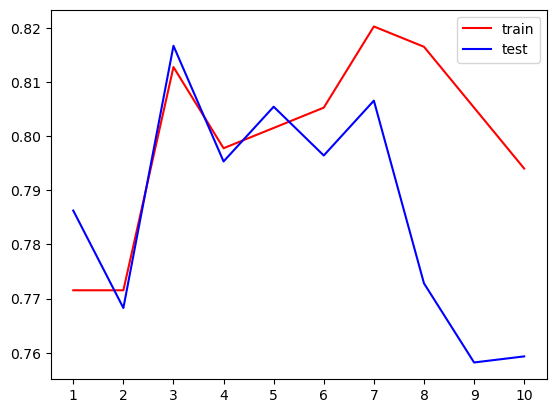

In [24]:
tr = []
te = []

for i in range(10):
    clf = DecisionTreeClassifier(random_state = 25
                                , max_depth = i+1
                                , criterion = 'entropy'
                                )
    clf = clf.fit(xtrain, ytrain)
    score_train = clf.score(xtest, ytest)
    score_test = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_train)
    te.append(score_test)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [25]:
#GridSearch
gini_threshold = np.linspace(0,0.5,20)
parameters = {'criterion':('gini','entropy')
            ,'splitter':('best', 'random')
            , 'max_depth' : [*range(1,10)]
            ,'min_samples_leaf':[*range(1,50,5)]
            ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
    
}


clf = DecisionTreeClassifier(random_state = 25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
                                                   0.3157894736842105,
                                                   0.3421052631578947,
                                                   0.3684210526315789,
                                                   0.39473684210526316,
                                                   0.42105263157894735,
                                                   0.4473684210526315,
                                                   0.47368421052631576, 0.5],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46],
                         'splitter': ('best', 'random')})

In [26]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [27]:
GS.best_score_

0.8263440860215054